<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/Idade_M%C3%A9dia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [5]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')

In [18]:
# https://stackoverflow.com/questions/71419895/utf-8-codec-cant-decode-byte-0xed
idade_media = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/populacaoesp_2022_idade_media.csv', encoding='latin1', sep=';')

In [8]:
data.head()

,Município,Codigo_IBGE,Gentílico,Prefeito,Área Territorial,População Estimada,Densidade Demográfica,Escolarização 6 a 14 anos,IDHM,Mortalidade Infantil,Receitas Realizadas,Despesas empenhadas,PIB per capita,Latitude,Longitude,Postos vacinação,Hospitais,Médicos
0,ADAMANTINA,3500105,adamantinense,MARCIO CARDIM,412,35111,"82,15","97,6",790,"11,63","16,071,867,925","13,708,366,993","30962,66",-22,-511,4,0,0
1,ADOLFO,3500204,adolfino,IZAEL ANTONIO FERNANDES,211,3554,"16,85","98,6",730,"19,23","2,733,374,731","2,010,387,713","25867,75",-212,-496,1,0,0
2,AGUAÍ,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,475,36648,"67,72","95,8",715,"16,06","8,409,476,006","7,216,873,408","28041,03",-221,-470,5,0,0
3,ÁGUAS DA PRATA,3500402,pratense,REGINA HELENA JANIZELO MORAES,143,8221,"53,05","98,8",781,"25,32","2,939,024,814","2,436,340,149","20683,88",-219,-467,1,0,0
4,ÁGUAS DE LINDÓIA,3500501,lindoiense,GILBERTO ABDOU HELOU,60,18808,"287,16","96,2",745,"8,37","8,694,922,213","7,520,147,793","26427,34",-225,-466,4,0,0


In [11]:
idade_media.head()

,cod_ibge,municipio,ano,idade_media,classe_idade_media
0,3500105,Adamantina,2022,"41,00","De 39,0 a 45,9"
1,3500204,Adolfo,2022,"40,90","De 39,0 a 45,9"
2,3500303,Aguaí,2022,"35,90","De 35,0 a 36,9"
3,3500402,Águas da Prata,2022,"40,90","De 39,0 a 45,9"
4,3500501,Águas de Lindóia,2022,"37,90","De 37,0 a 38,9"


In [23]:
data = data[['Município', 'Codigo_IBGE']]

In [20]:
idade_media.drop(['municipio', 'ano'], axis=1, inplace=True)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Município    645 non-null    object
 1   Codigo_IBGE  645 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ KB


In [21]:
idade_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cod_ibge            645 non-null    int64 
 1   idade_media         645 non-null    object
 2   classe_idade_media  645 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.2+ KB


##Juntando os DFs

In [30]:
idade_media_final = pd.merge(data, idade_media, left_on='Codigo_IBGE', right_on='cod_ibge', how='inner').drop(['cod_ibge'], axis=1)

In [32]:
idade_media_final

,Município,Codigo_IBGE,idade_media,classe_idade_media
0,ADAMANTINA,3500105,"41,00","De 39,0 a 45,9"
1,ADOLFO,3500204,"40,90","De 39,0 a 45,9"
2,AGUAÍ,3500303,"35,90","De 35,0 a 36,9"
3,ÁGUAS DA PRATA,3500402,"40,90","De 39,0 a 45,9"
4,ÁGUAS DE LINDÓIA,3500501,"37,90","De 37,0 a 38,9"
...,...,...,...,...
640,VOTORANTIM,3557006,"35,70","De 35,0 a 36,9"
641,VOTUPORANGA,3557105,"39,60","De 39,0 a 45,9"
642,ZACARIAS,3557154,"39,30","De 39,0 a 45,9"
643,CHAVANTES,3557204,"36,90","De 35,0 a 36,9"


In [31]:
idade_media_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 644
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Município           645 non-null    object
 1   Codigo_IBGE         645 non-null    int64 
 2   idade_media         645 non-null    object
 3   classe_idade_media  645 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.2+ KB


##Convertendo ```idade_media``` para float64

In [37]:
def toFloat_age(x):
  age = x.replace(',','')
  age = float(age)
  age = age/100
  return age
idade_media_final['idade_media'] = idade_media_final['idade_media'].apply(toFloat_age)

In [40]:
idade_media_final.head()

,Município,Codigo_IBGE,idade_media,classe_idade_media
0,ADAMANTINA,3500105,41.0,"De 39,0 a 45,9"
1,ADOLFO,3500204,40.9,"De 39,0 a 45,9"
2,AGUAÍ,3500303,35.9,"De 35,0 a 36,9"
3,ÁGUAS DA PRATA,3500402,40.9,"De 39,0 a 45,9"
4,ÁGUAS DE LINDÓIA,3500501,37.9,"De 37,0 a 38,9"


In [41]:
idade_media_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 644
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Município           645 non-null    object 
 1   Codigo_IBGE         645 non-null    int64  
 2   idade_media         645 non-null    float64
 3   classe_idade_media  645 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 25.2+ KB


##Ordenando ```classe_idade_media```

In [47]:
bkp = idade_media_final

In [51]:
classes = ['De 31,9 a 34,9',
           'De 35,0 a 36,9',
           'De 37,0 a 38,9',
           'De 39,0 a 45,9']
idade_media_final['classe_idade_media'] = pd.Categorical(idade_media_final['classe_idade_media'], classes, ordered=True)

In [52]:
idade_media_final['classe_idade_media']

0      De 39,0 a 45,9
1      De 39,0 a 45,9
2      De 35,0 a 36,9
3      De 39,0 a 45,9
4      De 37,0 a 38,9
            ...      
640    De 35,0 a 36,9
641    De 39,0 a 45,9
642    De 39,0 a 45,9
643    De 35,0 a 36,9
644    De 35,0 a 36,9
Name: classe_idade_media, Length: 645, dtype: category
Categories (4, object): ['De 31,9 a 34,9' < 'De 35,0 a 36,9' < 'De 37,0 a 38,9' < 'De 39,0 a 45,9']

##Analisando a distribuição proposta pela SEADE

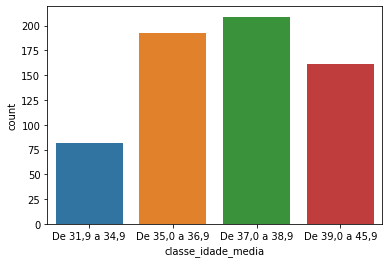

In [53]:
sns.countplot(data=idade_media_final, x='classe_idade_media')

In [45]:
idade_media_final['idade_media'].describe()

count    645.000000
mean      37.502171
std        2.259829
min       31.900000
25%       35.800000
50%       37.400000
75%       38.900000
max       45.900000
Name: idade_media, dtype: float64

In [54]:
idade_media_final['classe_idade_media'].value_counts()

De 37,0 a 38,9    209
De 35,0 a 36,9    193
De 39,0 a 45,9    161
De 31,9 a 34,9     82
Name: classe_idade_media, dtype: int64

Como é possível observar, a discretização proposta pela SEADE se aproxima de uma categorização por quartis. A maior categoria engloba 209 cidades, isto é, ~32% do dataset.

In [55]:
209/645

0.324031007751938